In [1]:
# dependencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
import statsmodels.api as sm
#sns.set_palette(sns.color_palette(['#851836', '#edbd17', ]))
#sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas.plotting import autocorrelation_plot



In [2]:
#reading data from file
train = pd.read_csv(r'C:/Testing/DA/predictFutureSalesClean.csv')
test = pd.read_csv('C:/Testing/DA/test.csv')
sample_submission = pd.read_csv('C:/Testing/DA/sample_submission.csv')
items = pd.read_csv('C:/Testing/DA/items.csv')
item_cats = pd.read_csv('C:/Testing/DA/item_categories.csv')
shops = pd.read_csv('C:/Testing/DA/shops.csv')

In [3]:
train.dtypes

Unnamed: 0              int64
date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
shop_name              object
item_name              object
item_category_id        int64
Required                 bool
item_category_name     object
date_month              int64
date_year               int64
total_sales           float64
dtype: object

In [4]:
#add more columns for feature engineering
all_data = train
all_data['date'] = pd.to_datetime(all_data.date, format='%Y.%m.%d')
all_data['date_week'] = all_data.date.dt.week
all_data['dayofweek_name'] = all_data.date.dt.day_name()
all_data['dayofweek_no'] = all_data.date.dt.dayofweek 
all_data['wrk_week'] = np.where(all_data['date_year']==2013, all_data['date_week'], np.where(all_data['date_year']==2014, all_data['date_week']+52, all_data['date_week']+104))

In [5]:
all_data

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,Required,item_category_name,date_month,date_year,total_sales,date_week,dayofweek_name,dayofweek_no,wrk_week
0,0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,True,Кино - Blu-Ray,1,2013,999.0,1,Wednesday,2,1
1,1,2013-01-03,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0,1,Thursday,3,1
2,2,2013-01-05,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0,1,Saturday,5,1
3,3,2013-01-07,0,25,2574,399.0,1.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,399.0,2,Monday,0,2
4,4,2013-01-08,0,25,2574,399.0,2.0,"Москва ТРК ""Атриум""",DEL REY LANA Born To Die The Paradise Editio...,55,True,Музыка - CD локального производства,1,2013,798.0,2,Tuesday,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442559,1442559,2015-10-10,33,25,7409,299.0,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,True,Музыка - CD локального производства,10,2015,299.0,41,Saturday,5,145
1442560,1442560,2015-10-09,33,25,7460,299.0,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,True,Музыка - CD локального производства,10,2015,299.0,41,Friday,4,145
1442561,1442561,2015-10-14,33,25,7459,349.0,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,True,Музыка - CD локального производства,10,2015,349.0,42,Wednesday,2,146
1442562,1442562,2015-10-22,33,25,7440,299.0,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,True,Музыка - MP3,10,2015,299.0,43,Thursday,3,147


In [6]:
#merging data from train and items
#all_data = train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'total_sales', 'week', 'month', 'year', 'day', 'dayofweek_day', 'wrk_week']].merge(items[['item_name', 'item_id', 'item_category_id']], on='item_id', how='left')
#all_data
#merging data from train, items and items cat
#all_data = all_data[['date', 'date_block_num', 'shop_id', 'item_id', 'item_name', 'item_price', 'item_cnt_day', 'total_sales', 'week', 'month', 'year', 'day', 'dayofweek_day', 'wrk_week', 'item_category_id']].merge(item_cats[['item_category_name', 'item_category_id']], on='item_category_id', how='left')
#all_data
#merging data from train, items, items cat and shops
#all_data = all_data[['date', 'date_block_num', 'item_id', 'item_name', 'item_price', 'item_cnt_day', 'total_sales', 'week', 'month', 'year', 'day', 'dayofweek_day', 'wrk_week', 'item_category_id', 'item_category_name', 'shop_id']].merge(shops[['shop_name', 'shop_id']], on='shop_id', how='left')
#all_data

In [7]:
#sort the values on date, shop_id and item_id
all_data = all_data.sort_values(by=['date', 'shop_id', 'item_id'])


Text(0, 0.5, 'Total Sales')

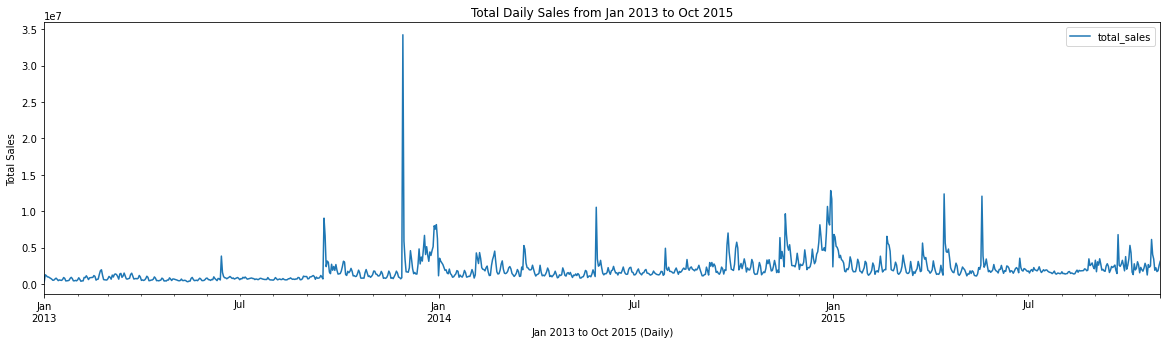

In [8]:
#plot daily line graph from jan 2013 to oct 2015
all_data_by_date = all_data[['date', 'total_sales']]

aggregations = {'total_sales':'sum'}
all_data_by_date = all_data_by_date.groupby(['date'], as_index=False).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)

ax = all_data_by_date.plot(x='date', y='total_sales', kind='line', figsize=(20,5))
ax.set_title('Total Daily Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Daily)")
ax.set_ylabel("Total Sales")

In [9]:
#all_data['week'] = all_data.date.dt.week
#all_data['month'] = all_data.date.dt.month
#all_data['year'] = all_data.date.dt.year
#all_data['day'] = all_data.date.dt.day_name()
#all_data['dayofweek_day'] = all_data.date.dt.dayofweek 
#all_data['weekday'] = np.where(all_data['dayofweek_day']<5, 'weekday', 'weekend')
#all_data

In [10]:
#all_data_wrk = all_data
#all_data_wrk['wrk_week'] = np.where(all_data_wrk['year']==2013, all_data_wrk['week'], np.where(all_data_wrk['year']==2014, all_data_wrk['week']+52, all_data_wrk['week']+104))
#all_data_wrk

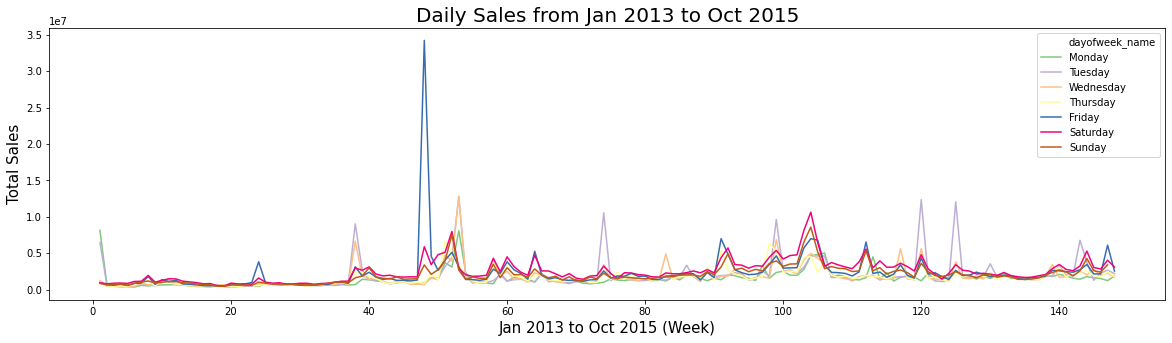

In [11]:
#plot weekly graph by year for better comparison
#all_data_weekday = all_data.groupby(['dayofweek_day', 'week', 'year'])[['total_sales']].agg('sum').reset_index()
#all_data_weekday = all_data_weekday.sort_values(['year', 'week', 'dayofweek_day'], ascending=[True, True, True])
#
#sns.lineplot(x='week', y='total_sales', hue='dayofweek_day', data = all_data_weekday, palette='Accent')
#plt.title("Total Sales", fontsize = 20)
#plt.rcParams['figure.figsize']=(10, 5)
#plt.xlabel("Year", fontsize = 15)
#plt.ylabel("Total Sales", fontsize = 15)
#plt.figure(figsize=(100, 6))
#plt.show()




all_data_weekday1 = all_data.loc[(all_data['dayofweek_name'] == 'Monday')]
all_data_weekday2 = all_data.loc[(all_data['dayofweek_name'] == 'Tuesday')]
all_data_weekday3 = all_data.loc[(all_data['dayofweek_name'] == 'Wednesday')]
all_data_weekday4 = all_data.loc[(all_data['dayofweek_name'] == 'Thursday')]
all_data_weekday5 = all_data.loc[(all_data['dayofweek_name'] == 'Friday')]
all_data_weekday6 = all_data.loc[(all_data['dayofweek_name'] == 'Saturday')]
all_data_weekday7 = all_data.loc[(all_data['dayofweek_name'] == 'Sunday')]

all_data_weekday1 = all_data_weekday1.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday2 = all_data_weekday2.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday3 = all_data_weekday3.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday4 = all_data_weekday4.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday5 = all_data_weekday5.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday6 = all_data_weekday6.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday7 = all_data_weekday7.groupby(['dayofweek_name', 'wrk_week'])[['total_sales']].agg('sum').reset_index()#.sort_values(['year', 'week'], ascending=[True,True])
all_data_weekday = pd.concat([all_data_weekday1, all_data_weekday2, all_data_weekday3, all_data_weekday4, all_data_weekday5, all_data_weekday6, all_data_weekday7])

plt.rcParams['figure.figsize']=(20, 5)
sns.lineplot(x='wrk_week', y = 'total_sales', data = all_data_weekday, hue='dayofweek_name' , palette = 'Accent')
plt.title("Daily Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Jan 2013 to Oct 2015 (Week)", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()


#all_data_weekday = all_data.groupby(['dayofweek_day', 'week', 'year'])[['total_sales']].agg('sum').reset_index()
#all_data_weekday = all_data_weekday.sort_values(['dayofweek_day', 'week', 'year'], ascending=[True, True, True])
#all_data_weekday

#fig, ax = plt.subplots(figsize=(15,7))
#all_data.groupby(['dayofweek_day','week', 'year']).sum()['total_sales'].unstack().plot(ax=ax)
#ax.set_xlabel('Date')
#ax.set_ylabel('Amount of transactions')

In [12]:
#plot weekly line graph from jan 2013 to oct 2015
#all_data_working = all_data[['date', 'total_sales', 'weekday', 'week', 'year']]
#all_data_working

#all_data_working_weekday = all_data_working[all_data_working['weekday']=='weekday']
#all_data_working_weekend = all_data_working[all_data_working['weekday']=='weekend']


In [13]:
#plot weekly line graph from jan 2013 to oct 2015
#all_data_working = all_data[['date', 'total_sales', 'weekday', 'week', 'year']]

#all_data_working_weekday = all_data_working[all_data_working['weekday']=='weekday']
#all_data_working_weekend = all_data_working[all_data_working['weekday']=='weekend']

#aggregations = {'total_sales':'sum'}
#all_data_by_weekday = all_data_working_weekday.groupby(['year', 'week', 'weekday']).agg(aggregations)
#all_data_by_weekend = all_data_working_weekend.groupby(['year', 'week', 'weekday']).agg(aggregations)
#pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
#ax = all_data_by_weekday['total_sales'].plot(figsize=(20,5))
#ax.set_title('Total sales from Jan 2013 to Oct 2015')
#ax.set_xlabel("Time (year-week)")
#ax.set_ylabel("Total Sales")

#ax = all_data_by_weekend['total_sales'].plot(figsize=(20,5), legend=True)
#ax.set_title('Total sales from Jan 2013 to Oct 2015')
#ax.set_xlabel("Time (year-week)")
#ax.set_ylabel("Total Sales")

Text(0, 0.5, 'Total Sales')

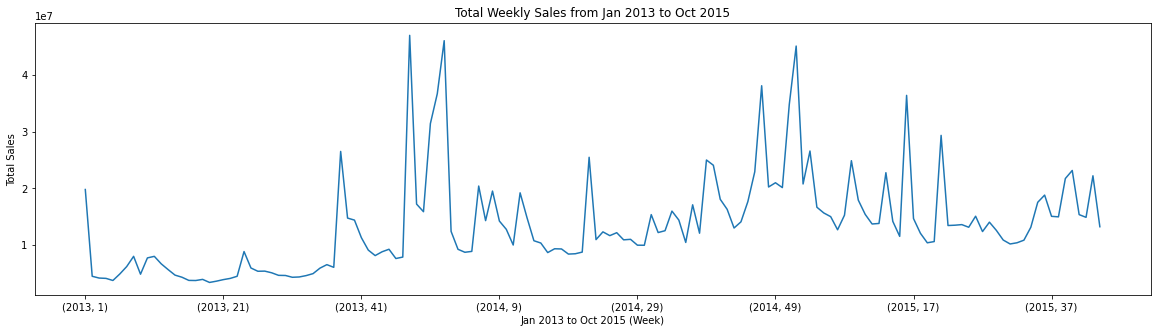

In [14]:
#plot weekly line graph from jan 2013 to oct 2015
all_data_by_week = all_data[['date', 'total_sales', 'date_week', 'date_year']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_week = all_data_by_week.groupby(['date_year', 'date_week']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
ax = all_data_by_week['total_sales'].plot(figsize=(20,5))
ax.set_title('Total Weekly Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Week)")
ax.set_ylabel("Total Sales")

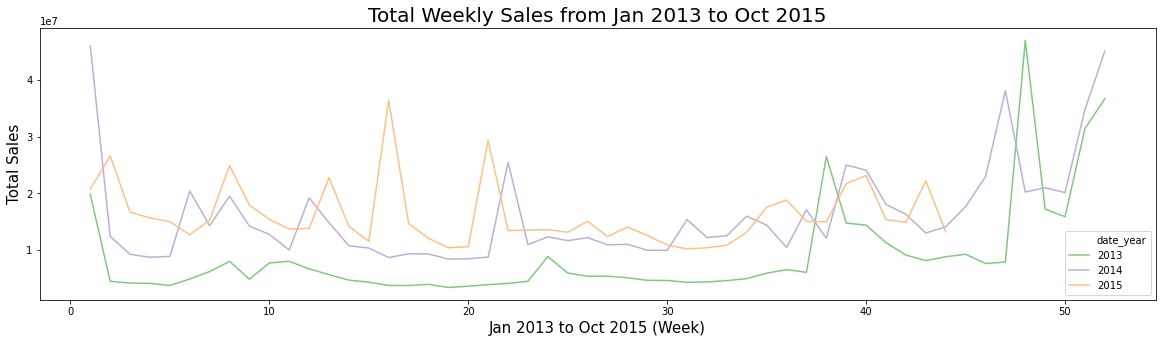

In [15]:
#plot weekly graph by year for better comparison
all_data_by_week = all_data.groupby(['date_week', 'date_year'])[['total_sales']].agg('sum').reset_index()
#all_data_agg


plt.rcParams['figure.figsize']=(20, 5)
sns.lineplot(x='date_week', y='total_sales', hue='date_year', data = all_data_by_week, palette='Accent')
plt.title("Total Weekly Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Jan 2013 to Oct 2015 (Week)", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
#plt.figure(figsize=(100, 6))
plt.show()

Text(0, 0.5, 'Total Sales')

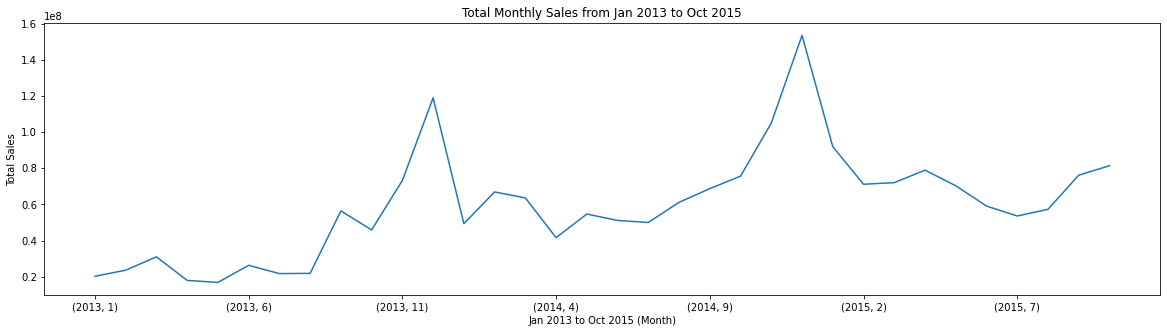

In [16]:
#plot monthly line graph from jan 2013 to oct 2015
all_data_by_month = all_data[['date', 'total_sales', 'date_month', 'date_year']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_month = all_data_by_month.groupby(['date_year', 'date_month']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
ax = all_data_by_month['total_sales'].plot(figsize=(20,5))
ax.set_title('Total Monthly Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Month)")
ax.set_ylabel("Total Sales")

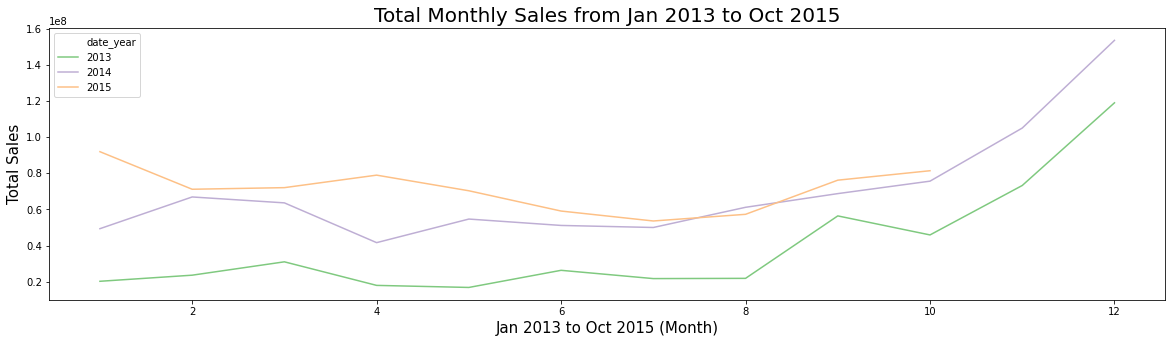

In [17]:
#plot monthly graph by year for better comparison
all_data_by_month = all_data.groupby(['date_month', 'date_year'])[['total_sales']].agg('sum').reset_index()
#all_data_agg

sns.lineplot(x='date_month', y='total_sales', hue='date_year', data = all_data_by_month, palette = 'Accent')
plt.rcParams['figure.figsize']=(20, 5)
plt.title("Total Monthly Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Jan 2013 to Oct 2015 (Month)", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()

Text(0, 0.5, 'Total Sales')

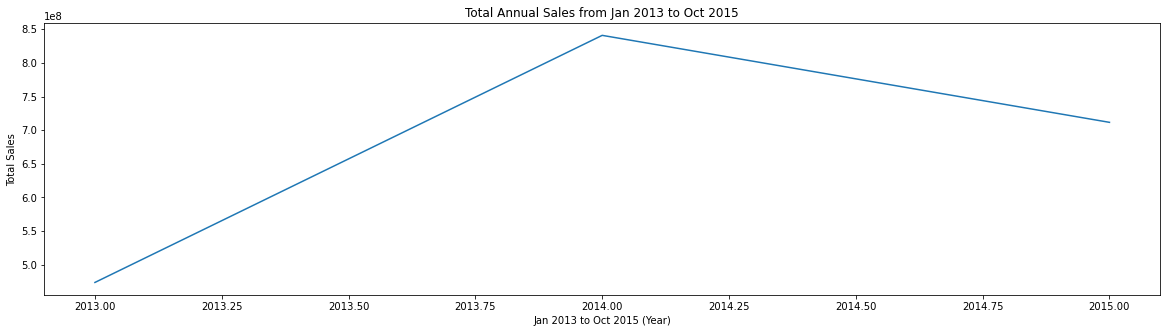

In [18]:
#plot monthly line graph from jan 2013 to oct 2015
all_data_by_year = all_data[['date', 'total_sales', 'date_year']]
#all_data_working

aggregations = {'total_sales':'sum'}
all_data_by_year = all_data_by_year.groupby(['date_year']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)
#all_data_by_week
ax = all_data_by_year['total_sales'].plot(figsize=(20,5))
ax.set_title('Total Annual Sales from Jan 2013 to Oct 2015')
ax.set_xlabel("Jan 2013 to Oct 2015 (Year)")
ax.set_ylabel("Total Sales")

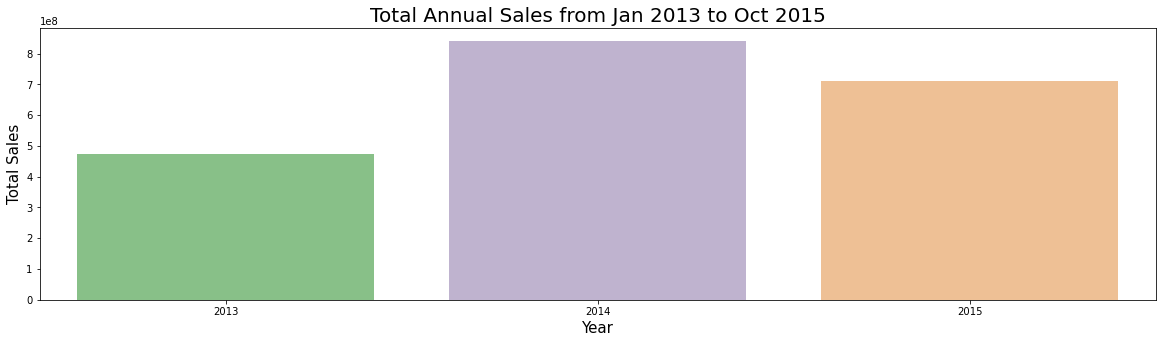

In [19]:
#plot monthly graph by year for better comparison
all_data_by_year = all_data.groupby(['date_year'])[['total_sales']].agg('sum').reset_index()
#all_data_agg

sns.barplot(x='date_year', y='total_sales', data = all_data_by_year, palette = 'Accent')
plt.title("Total Annual Sales from Jan 2013 to Oct 2015", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Sales", fontsize = 15)
plt.show()

In [20]:
#all_data

In [36]:
#construct the table by each day
all_data_by_weekday = all_data[['date', 'item_cnt_day', 'date_week', 'date_year', 'dayofweek_name', 'dayofweek_no']]
aggregations = {'item_cnt_day':'sum'}
all_data_by_weekday = all_data_by_weekday.groupby(['date_year', 'date_week', 'dayofweek_name', 'dayofweek_no']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.0f}'.format)
all_data_by_weekday.sort_values(by=['date_year', 'date_week', 'dayofweek_no', 'dayofweek_name'])

item_cnt_day
date_year date_week dayofweek_name dayofweek_no                     
2013      1         Monday         0                           6,268
                    Tuesday        1                           5,571
                    Wednesday      2                           1,788
                    Thursday       3                           1,622
                    Friday         4                           1,390
...                                                              ...
2015      44        Tuesday        1                           1,474
                    Wednesday      2                           3,555
                    Thursday       3                           1,535
                    Friday         4                           2,146
                    Saturday       5                           2,944

[1032 rows x 1 columns]

[Text(0, 0, '(2015, 16, Saturday, 5)'),
 Text(0, 0, '(2013, 1, Friday, 4)'),
 Text(0, 0, '(2013, 29, Thursday, 3)'),
 Text(0, 0, '(2014, 6, Monday, 0)'),
 Text(0, 0, '(2014, 34, Tuesday, 1)'),
 Text(0, 0, '(2015, 11, Tuesday, 1)'),
 Text(0, 0, '(2015, 40, Saturday, 5)'),
 Text(0, 0, '')]

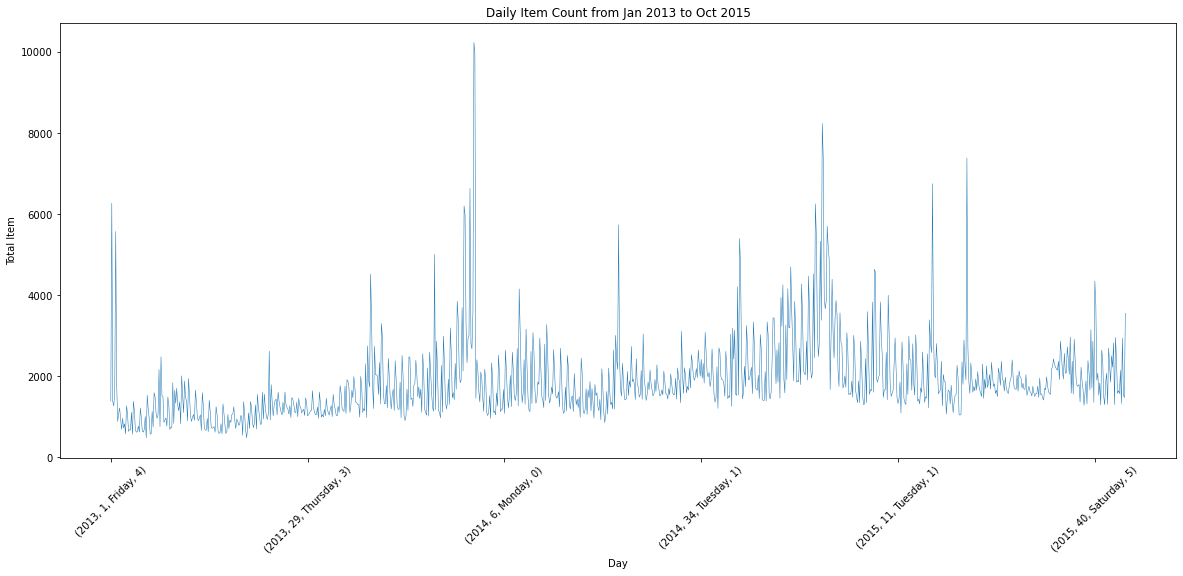

In [37]:
#construct the graph
ax = all_data_by_weekday['item_cnt_day'].plot(linewidth=0.5)
ax.set_title('Daily Item Count from Jan 2013 to Oct 2015')
ax.set_xlabel("Day")
ax.set_ylabel("Total Item")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [23]:
#lag feature 

all_data_by_day = all_data
aggregations = {'total_sales':'sum'}
all_data_by_day = all_data_by_day.groupby(['date'], as_index=False).agg(aggregations)
all_data_by_day['lag_1'] = all_data_by_day['total_sales'].shift(1)
all_data_by_day['lag_2'] = all_data_by_day['total_sales'].shift(2)
all_data_by_day['lag_3'] = all_data_by_day['total_sales'].shift(3)
all_data_by_day['lag_4'] = all_data_by_day['total_sales'].shift(4)
all_data_by_day['lag_5'] = all_data_by_day['total_sales'].shift(5)
all_data_by_day['lag_6'] = all_data_by_day['total_sales'].shift(6)
all_data_by_day['lag_7'] = all_data_by_day['total_sales'].shift(7)
all_data_by_day

,date,total_sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-01,"286,396",nan,nan,nan,nan,nan,nan,nan
1,2013-01-02,"1,258,655","286,396",nan,nan,nan,nan,nan,nan
2,2013-01-03,"1,131,019","1,258,655","286,396",nan,nan,nan,nan,nan
3,2013-01-04,"965,669","1,131,019","1,258,655","286,396",nan,nan,nan,nan
4,2013-01-05,"955,023","965,669","1,131,019","1,258,655","286,396",nan,nan,nan
...,...,...,...,...,...,...,...,...,...
1029,2015-10-27,"2,211,635","1,882,246","3,412,849","4,040,446","6,107,958","2,480,586","2,289,480","2,659,224"
1030,2015-10-28,"1,696,390","2,211,635","1,882,246","3,412,849","4,040,446","6,107,958","2,480,586","2,289,480"
1031,2015-10-29,"1,822,707","1,696,390","2,211,635","1,882,246","3,412,849","4,040,446","6,107,958","2,480,586"
1032,2015-10-30,"2,551,906","1,822,707","1,696,390","2,211,635","1,882,246","3,412,849","4,040,446","6,107,958"


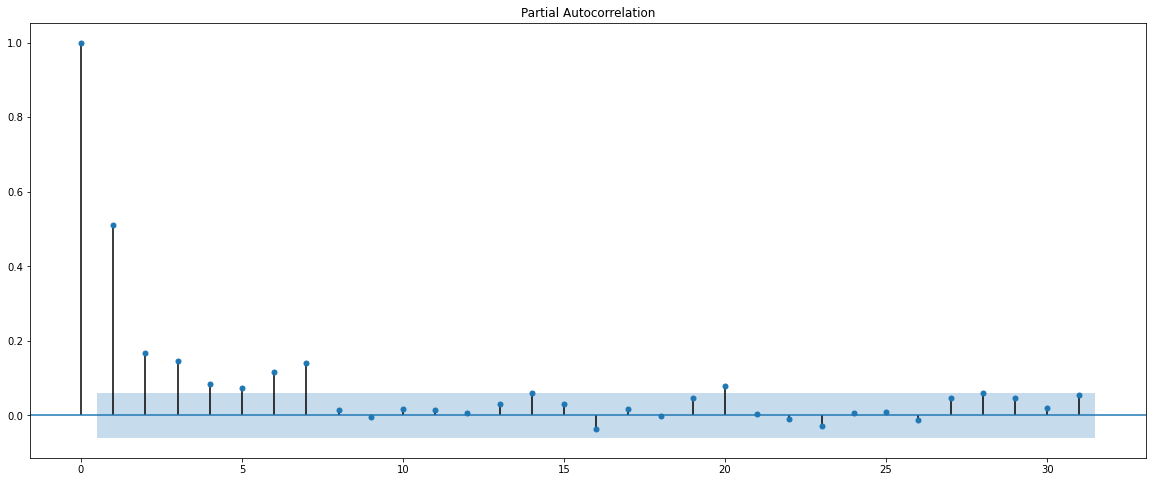

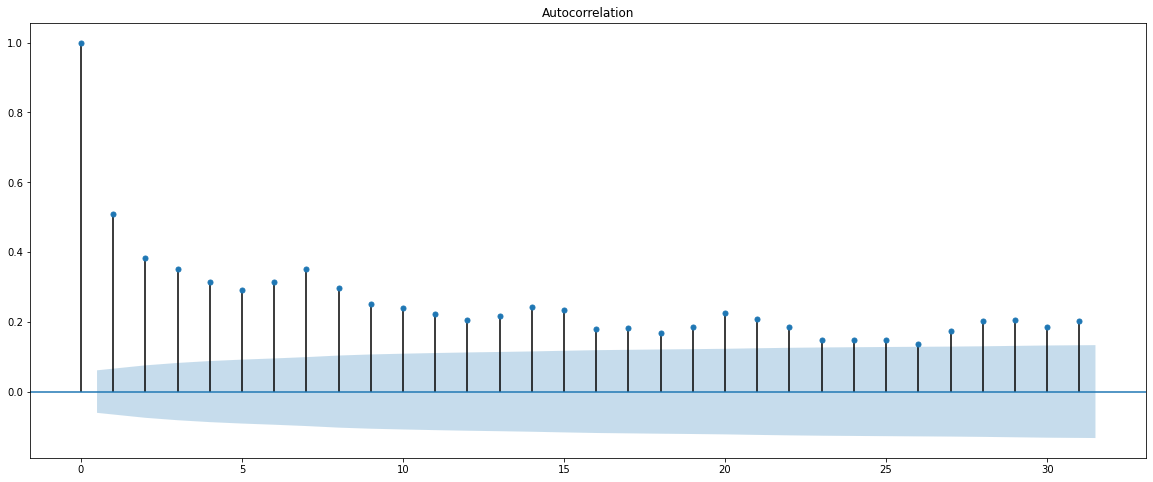

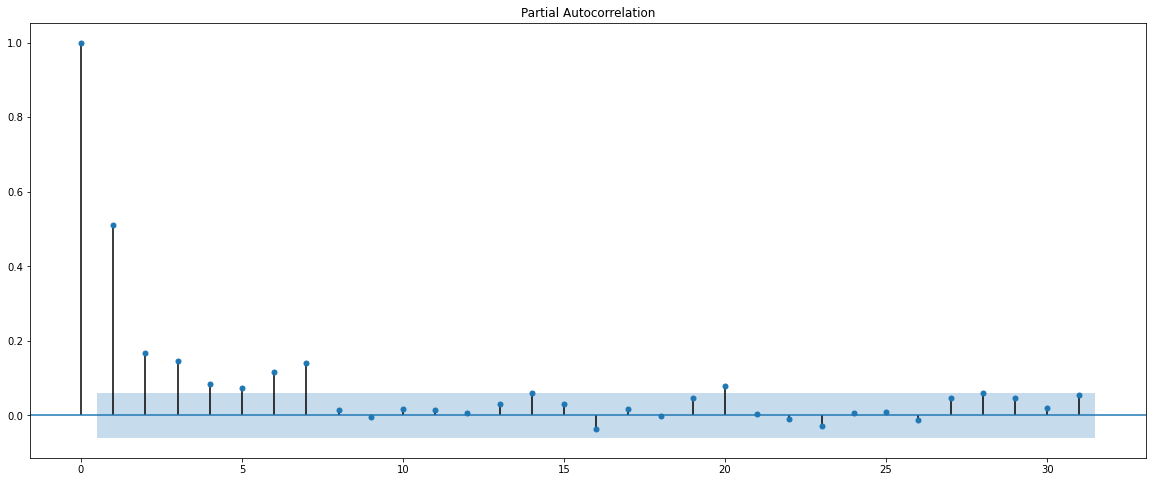

In [39]:
#plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(all_data_by_day['total_sales'])
plot_pacf(all_data_by_day['total_sales'])

In [25]:
#to group the data by date and shop_id and do lagging

#all_data_working = all_data
#all_data_working['lag1'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(1)
#all_data_working['lag2'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(2)
#all_data_working['lag3'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(3)
#all_data_working['lag4'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(4)
#all_data_working['lag5'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(5)
#all_data_working['lag6'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(6)
#all_data_working['lag7'] = all_data_working.groupby(['date', 'shop_id'])['total_sales'].shift(7)
#all_data_working.to_csv ('C:\Testing\DA\Result\Week_Data.csv', index = False, header=True)

#all_data_working['seq'].max()
#all_data_working.loc[all_data_working['seq']==1022]
#all_data_working.loc[all_data_working['date']=='2014-12-30']

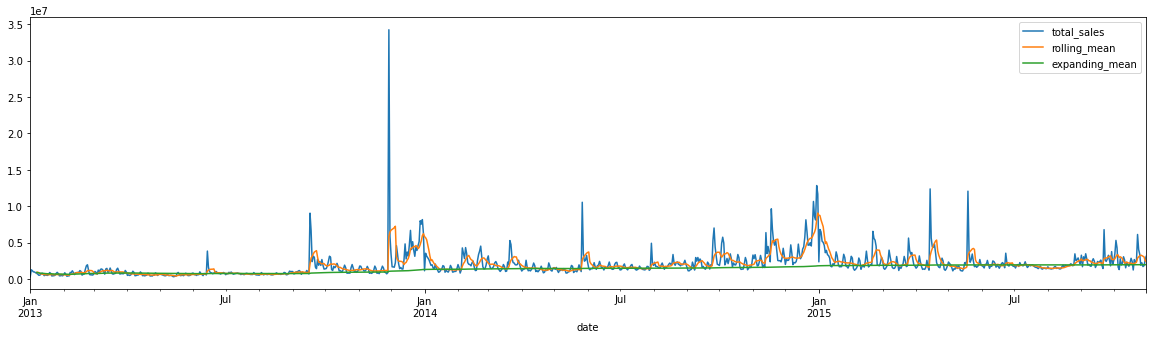

In [45]:
#construct the rolling mean, expanding mean of 7 days (1 week) compare with total sales
all_data_by_day['rolling_mean'] = all_data_by_day['total_sales'].rolling(window=7).mean()
all_data_by_day['expanding_mean'] = all_data_by_day['total_sales'].expanding(7).mean()
all_data_by_day[['total_sales', 'rolling_mean', 'expanding_mean']].plot(figsize=(20, 5))

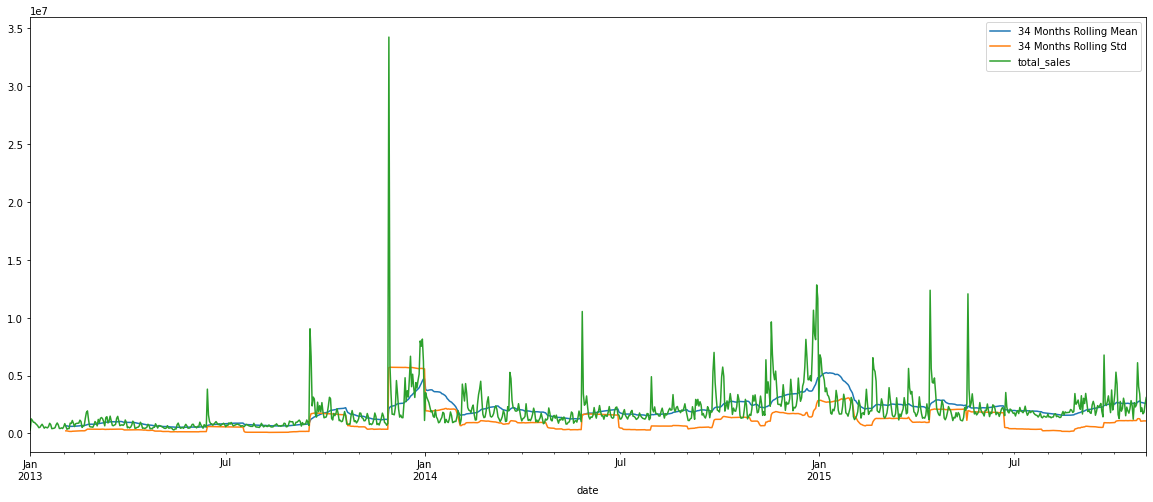

In [27]:
#rolling statistic to see the variation of mean and standard deviation
plt.rcParams['figure.figsize']=(20, 8)
all_data_by_day = all_data.groupby(['date']).agg(aggregations)
timeseries = all_data_by_day['total_sales']
timeseries.rolling(34).mean().plot(label='34 Months Rolling Mean')
timeseries.rolling(34).std().plot(label='34 Months Rolling Std')
timeseries.plot()
plt.legend()


<Figure size 1440x576 with 0 Axes>

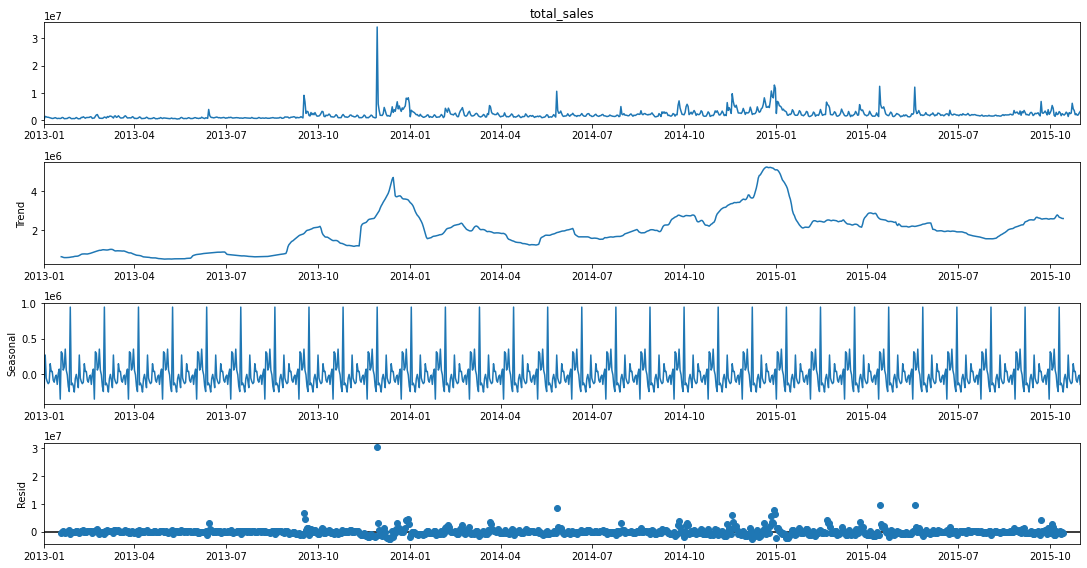

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(all_data_by_day['total_sales'], period=34)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)
#the data is seasonal and there is an upward trend at the year end

In [29]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(all_data_by_day['total_sales'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result [1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")


ADF Test:
ADF Statistic: -6.09229291052695
p-value: 1.0295633519118959e-07
No. of Lags Used: 6
Number of Observations Used: 1027
Reject null hypothesis and data is stationary


In [30]:
model = sm.tsa.statespace.SARIMAX(all_data_by_day['total_sales'],order=(0,1,0), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                          total_sales   No. Observations:                 1034
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -16200.672
Date:                              Sun, 20 Dec 2020   AIC                          32407.344
Time:                                      21:05:52   BIC                          32422.130
Sample:                                  01-01-2013   HQIC                         32412.958
                                       - 10-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0381      0.099     -0.386      0.700      -0.231       0.155
ma.S.L12      -0.97

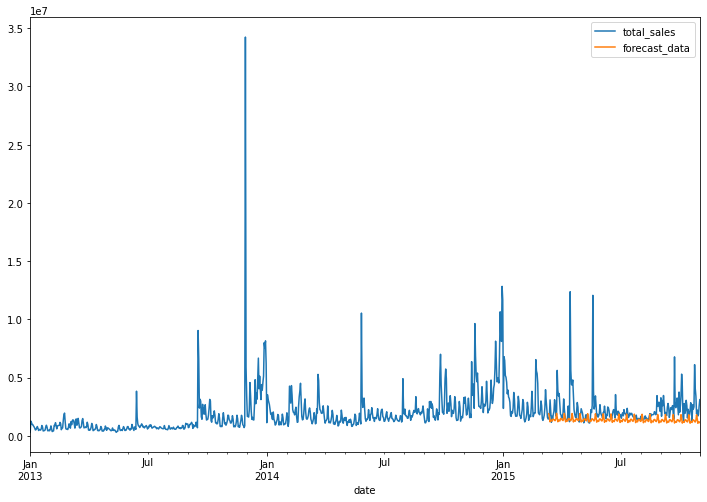

In [31]:
all_data_by_day['forecast_data'] = ARIMAresult.predict(start = 800, end= 1200, dynamic= True)  
all_data_by_day [['total_sales','forecast_data']]. plot (figsize= (12,8))

date
2013-01-01                    nan
2013-01-02                    nan
2013-01-03                    nan
2013-01-04                    nan
2013-01-05                    nan
2013-01-06                    nan
2013-01-07                887,370
2013-01-08                940,140
2013-01-09                831,353
2013-01-10                745,291
Name: total_sales, dtype: float64


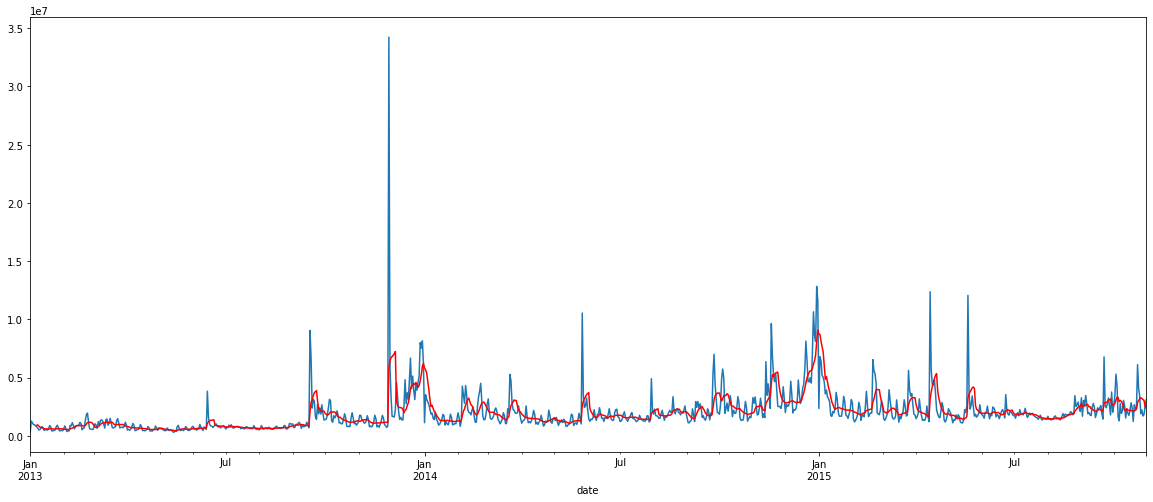

In [42]:
#moving average with a window size of 7 days
timeseries = all_data_by_day['total_sales']
rolling = timeseries.rolling(window=7)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
timeseries.plot()
rolling_mean.plot(color='red')
plt.show()